# Regression

For an overview on regression see [Wikipedia](https://en.wikipedia.org/wiki/Regression_analysis)

In [11]:
import numpy as np

import pandas as pd

from sklearn import datasets, linear_model


### Demo
This is a visual demo of a regression on a single variable. It is from [Scikit-learn documentation](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html).

Two [quality of fit metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) are also computed.

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


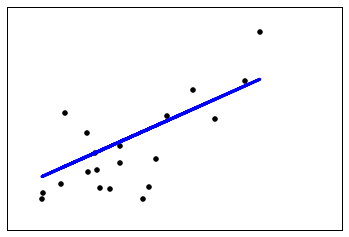

In [13]:
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Dummy Regression

We will demonstrate regression with an automatically generated example.

In [90]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples = 300, n_features=30, 
                             n_informative=4, noise=1.5,
                             bias=0.1, 
                             coef=True)

In [91]:
from sklearn.cross_validation import train_test_split
from sklearn.dummy import DummyRegressor

X_train, X_test, Y_train, Y_test = train_test_split(X, y)

## Linear regression

The simplest regression model is a [linear one](https://en.wikipedia.org/wiki/Linear_regression). It's also the one used in the first example.

In [93]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)
regressor.score(X_test, Y_test)

0.99829272971844885

In [94]:
# Because we created the model we can compare the coefficients
print(coef)
print(regressor.coef_)

[  0.          28.58845312   0.           0.           0.           0.           0.
   0.           0.          11.93077114   0.           0.           0.           0.
  24.04775151   0.           0.           0.           0.           0.           0.
  15.79860234   0.           0.           0.           0.           0.           0.
   0.           0.        ]
[ -2.05411570e-02   2.85977512e+01   1.57651729e-02  -5.25536059e-02
  -1.03088219e-01  -1.38872587e-01   9.50227868e-02  -1.81823686e-01
   5.73814482e-02   1.20936988e+01  -1.11925413e-01  -9.07402213e-02
   9.42494840e-02  -6.30044821e-02   2.40471663e+01   1.72958983e-01
  -1.15757755e-01  -5.06785722e-02   8.31488731e-02  -6.42454465e-02
   1.79464476e-03   1.57583120e+01  -1.79175685e-02  -2.63467931e-03
  -3.51440240e-02   1.30071064e-01   1.05410687e-01   1.12320521e-02
   1.69295954e-01  -2.41883029e-01]


## Support vector regression

A more powerful paradigm is [support vector regression](https://en.wikipedia.org/wiki/Support_vector_machine#Regression) . It can perform better than linear regression but for instance in this case it doesn't. If chosen methods perform equally one should choose the simpler one or the one that makes less assumptions.

In [95]:
from sklearn.svm import SVR

regressor = SVR(kernel="linear")
regressor.fit(X_train, Y_train)
regressor.score(X_test, Y_test)

0.99814101957195134

In [60]:
regressor

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Kernel Trick

It's usually possible to make a linear regressor or classifier into a nonlinear one using the [kernel trick](https://en.wikipedia.org/wiki/Kernel_method). The fancy name essentially means that a nonlinear transformation is made before applying a linear method. 

In [96]:
regressor = SVR(kernel="rbf")
regressor.fit(X_train, Y_train)
regressor.score(X_test, Y_test)

0.09014455611746075

## Lasso

If there's reason to believe that only a subset of the data will be relevant to the regression, the [Lasso algorithm](https://en.wikipedia.org/wiki/Lasso_%28statistics%29) is a staple to use to drop irrelevant features.

In [97]:
from sklearn.linear_model import Lasso


regressor = Lasso()
regressor.fit(X_train, Y_train)
regressor.score(X_test, Y_test)


0.99651160053710619

In [99]:
#see how lasso gets the 0 coefficients to actually 0 and not very close
regressor.coef_

array([ -0.        ,  27.51293275,  -0.        ,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,  11.15433248,   0.        ,  -0.        ,
        -0.        ,   0.        ,  23.15822334,   0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
        -0.        ,  14.76663532,  -0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ])

# Boston house prices


The goal in the Boston house prices datasets is to predict the median value of house prices in an area using other data about the area.

Go ahead and try to predict the house prices using the example methods given or a method of your own choosing.


In [100]:
from sklearn import datasets
house_prices = datasets.load_boston()
print(house_prices.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# Diabetes data

The diabetes dataset consists of measurements from users and a 
quantitative value representing their state one year from the measurements. The goal is to predict their state one year from now based on the values.

See more info [here](http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset).


In [101]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
#the diabetes dataset doesn't contain a written description so see the URL